In [42]:
# !pip3 install networkx
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install scikit-learn
# !pip3 install tqdm
# !pip3 install matplotlib
!pipreqsnb .
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

pipreqs  .
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt


In [2]:
df = pd.read_csv("./data/space_data.tsv", sep = "\t")
df.head()

,source,target,depth
0,space exploration,discovery and exploration of the solar system,1
1,space exploration,in-space propulsion technologies,1
2,space exploration,robotic spacecraft,1
3,space exploration,timeline of planetary exploration,1
4,space exploration,landings on other planets,1


In [35]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())
print(G)

Graph with 2088 nodes and 3178 edges


In [19]:
def get_randomwalk(node, path_length):
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            continue

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk


get_randomwalk('space exploration', 10)

['space exploration',
 'landings on other planets',
 'deliberate crash landings on extraterrestrial bodies',
 'flyby (spaceflight)']

In [20]:
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(10):
        random_walks.append(get_randomwalk(n,10))
        
# count of sequences
len(random_walks)

100%|██████████| 2088/2088 [00:00<00:00, 13574.64it/s]


20880

In [21]:
# !pip3 install gensim
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [38]:
model = Word2Vec(window = 5, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 2)

model.build_vocab(random_walks, progress_per=3)

model.train(random_walks, total_examples = model.corpus_count, epochs=50, report_delay=1)

(4896174, 5047900)

In [39]:
model.wv.most_similar('space tourism')

[('space flight participant', 0.6545183658599854),
 ('astronaut training', 0.6004526019096375),
 ('space tourism society', 0.5319269895553589),
 ('alien flight student program', 0.5120189785957336),
 ('reduced-gravity aircraft', 0.5112293362617493),
 ('ultralight aviation', 0.5039615631103516),
 ('planetspace', 0.5031275749206543),
 ('civil aerospace medical institute', 0.49742263555526733),
 ('micro-g environment', 0.4835583567619324),
 ('pressure-fed engine (rocket)', 0.4746320843696594)]

In [40]:
def plot_nodes(word_list):
    X = model.wv[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

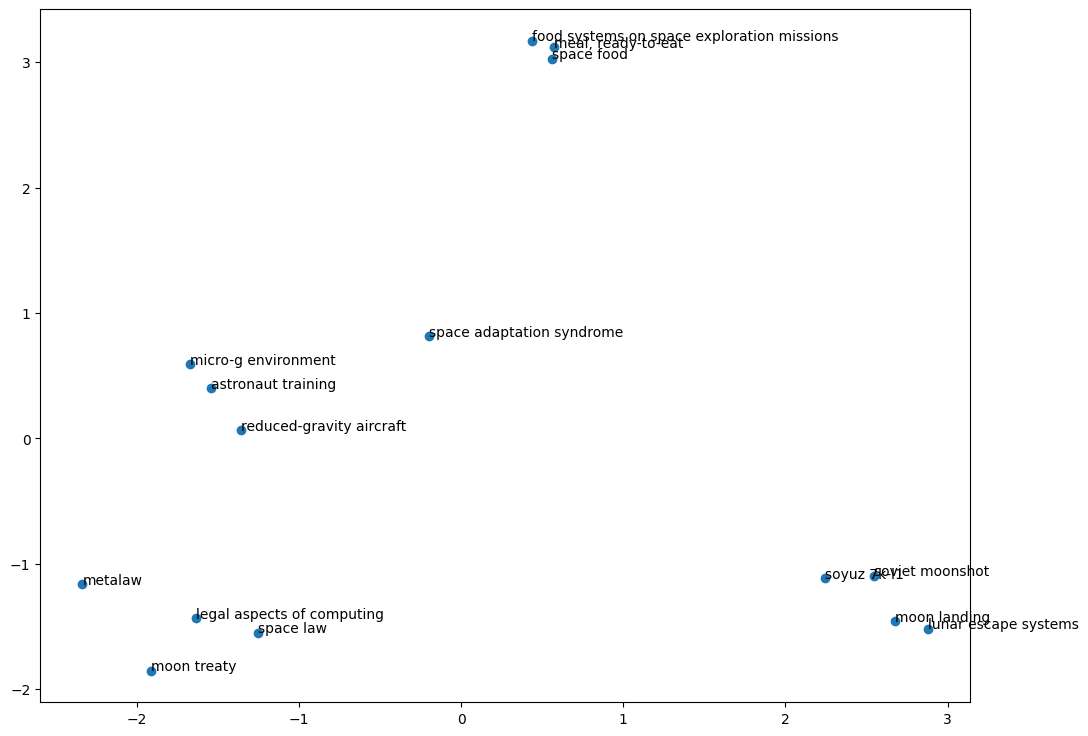

In [41]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 
         'moon landing','space food', 'food systems on space exploration missions', 
         'meal, ready-to-eat','space law', 'metalaw', 'moon treaty', 
         'legal aspects of computing','astronaut training', 'reduced-gravity aircraft', 
         'space adaptation syndrome', 'micro-g environment']
plot_nodes(terms)